In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
def read_corpus(corpus_file, use_sentiment):
    st = PorterStemmer()
    stop = stopwords.words('english')
    documents = []
    labels = []
    with open(corpus_file, encoding='utf-8') as f:
        for line in f:
            tokens = line.strip().split()
            
            # remove stopwords    
            doc = [token for token in tokens[3:] if token not in stop]
        
            # porter stemmer
            doc = [st.stem(word) for word in doc]

            documents.append(doc)

            if use_sentiment:
                # 2-class problem: positive vs negative
                labels.append( tokens[1] )
            else:
                # 6-class problem: books, camera, dvd, health, music, software
                labels.append( tokens[0] )
                
    return np.array(documents), np.array(labels)

In [3]:
# a dummy function that just returns its input
def identity(x):
    return x

In [77]:
X, Y = read_corpus('trainset.txt', use_sentiment=False)

In [5]:
vec = TfidfVectorizer(preprocessor = identity,
                      tokenizer = identity)

In [62]:
params = {
    "cls__n_neighbors": range(2,50),
    "cls__weights": ["distance"]
}

In [103]:
clf = Pipeline( [('vec', vec), ('cls', KNeighborsClassifier())] )

In [64]:
dfs = []
for measure in ["f1_micro", "f1_macro"]:
    GS = GridSearchCV(clf, params, cv=5, scoring=measure, n_jobs=4, return_train_score=True, verbose=1)
    GS.fit(X,Y);
    print(GS.best_params_)
    dfs.append(pd.DataFrame(GS.cv_results_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   41.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  3.8min finished


{'cls__n_neighbors': 45, 'cls__weights': 'distance'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  3.8min finished


{'cls__n_neighbors': 45, 'cls__weights': 'distance'}


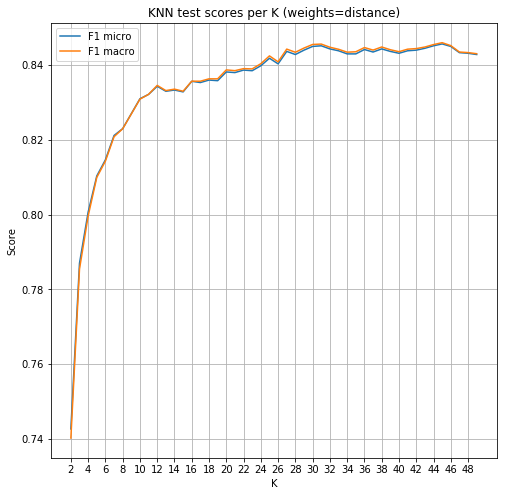

In [71]:
plt.figure(figsize=(8,8))
for df in dfs:
    plt.plot(df["param_cls__n_neighbors"], df["mean_test_score"])
plt.title("KNN test scores per K (weights=distance)")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend(["F1 micro", "F1 macro"])
plt.grid(True)
plt.xticks(np.arange(2, 50, step=2))
plt.savefig('KNN.png')
plt.show()

In [70]:
dfs[0].sort_values(by="mean_test_score", ascending=False).iloc[0:2]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cls__n_neighbors,param_cls__weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
43,0.509570,0.056956,0.616142,0.037094,45,distance,"{'cls__n_neighbors': 45, 'cls__weights': 'dist...",0.849543,0.829451,0.865000,...,0.845667,0.011815,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
29,0.521657,0.032603,0.610296,0.026119,31,distance,"{'cls__n_neighbors': 31, 'cls__weights': 'dist...",0.850374,0.827787,0.860833,...,0.845167,0.011327,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
